****Data Cleaning****




In [56]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Loss and Waste.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25416 entries, 0 to 25415
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  25416 non-null  int64  
 1   country                   25416 non-null  object 
 2   region                    1214 non-null   object 
 3   cpc_code                  25416 non-null  object 
 4   commodity                 25416 non-null  object 
 5   year                      25416 non-null  int64  
 6   loss_percentage           25416 non-null  float64
 7   loss_percentage_original  25416 non-null  object 
 8   loss_quantity             539 non-null    object 
 9   activity                  22608 non-null  object 
 10  food_supply_stage         22025 non-null  object 
 11  treatment                 1320 non-null   object 
 12  cause_of_loss             1002 non-null   object 
 13  sample_size               1192 non-null   object 
 14  method

In [57]:
data.duplicated().sum()

158

In [58]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [59]:
# Drop columns
columns_to_drop = ["m49_code", "region", "cpc_code", "method_data_collection", 
                   "reference", "url", "notes", "sample_size","loss_percentage_original","food_supply_stage"]
data.drop(columns_to_drop, axis=1, inplace=True)

data = data[data["commodity"].str.contains('rice', case=False)]

data.head()


,country,commodity,year,loss_percentage,loss_quantity,activity,treatment,cause_of_loss
0,Myanmar,"Rice, milled",2015,1.78,26.12kgs,Storage,"30 days storage, with trapping",Rodents
1,Myanmar,"Rice, milled",2015,11.77,88.18kgs,Storage,"60 days storage, no trapping",Rodents
2,Myanmar,"Rice, milled",2015,5.88,44.09kgs,Storage,"30 days storage, no trapping",Rodents
3,Myanmar,"Rice, milled",2015,3.57,52.24kgs,Storage,"60 days storage, with trapping",Rodents
4,Myanmar,"Rice, milled",2015,17.65,132.27kgs,Storage,"90 days storage, no trapping",Rodents


In [60]:
data["activity"].unique()

array(['Storage', 'Winnowing', 'Transportation', 'Drying, Harvesting',
       'Shelling, Threshing', 'Milling', 'Drying', 'Parboiling',
       'Harvesting', 'Distribution', 'Drying, Farm', 'Processing', nan,
       'Retailing', 'Threshing', 'Consumption', 'Farm, Threshing',
       'Cleaning, Farm', 'Assembling, Farm', 'Packaging',
       'Marketing, Storage',
       'Loading, Marketing, Transportation, Unloading',
       'Marketing, Storage, Transportation', 'Farm, Storage', 'Loading',
       'Marketing, Transportation', 'Bagging, Packaging',
       'Cleaning, Collection, Distribution, Drying, Field, Harvesting, Shelling, Storage, Threshing, Transportation',
       'Loading, Unloading', 'Farm', 'Collection', 'Marketing',
       'Cleaning, Winnowing', 'Wholesale', 'Stacking',
       'Milling, Processing', 'Handling', 'Packaging, Transportation',
       'Farm, Harvesting', 'Farm, Harvesting, Retailing', 'Shelling',
       'Grading, Sorting', 'Handling, Storage',
       'Farm, Manufacturi

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4405 entries, 0 to 25399
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          4405 non-null   object 
 1   commodity        4405 non-null   object 
 2   year             4405 non-null   int64  
 3   loss_percentage  4405 non-null   float64
 4   loss_quantity    38 non-null     object 
 5   activity         4283 non-null   object 
 6   treatment        316 non-null    object 
 7   cause_of_loss    80 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 309.7+ KB


In [62]:
data.dropna()
data.shape

(4405, 8)

In [63]:
# Initialize an empty list to store the new rows
new_rows = []

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the "activity" column is a string
    if isinstance(row["activity"], str):
        # Split the "activity" column by comma (,) if it's a string
        activities = row["activity"].split(", ")
        
        # Create a new row for each activity and append it to the new_rows list
        for activity in activities:
            new_row = row.copy()  # Create a copy of the original row
            new_row["activity"] = activity  # Set the "activity" column to the split value
            new_rows.append(new_row)  # Append the new row to the list

# Drop the original rows from the original DataFrame
data.drop(data.index, inplace=True)

# Create a new DataFrame from the list of new rows
new_data = pd.DataFrame(new_rows)

# Add the new rows to the current dataset
data = pd.concat([data, new_data], ignore_index=True)
data["activity"].unique()

array(['Storage', 'Winnowing', 'Transportation', 'Drying', 'Harvesting',
       'Shelling', 'Threshing', 'Milling', 'Parboiling', 'Distribution',
       'Farm', 'Processing', 'Retailing', 'Consumption', 'Cleaning',
       'Assembling', 'Packaging', 'Marketing', 'Loading', 'Unloading',
       'Bagging', 'Collection', 'Field', 'Wholesale', 'Stacking',
       'Handling', 'Grading', 'Sorting', 'Manufacturing'], dtype=object)

In [64]:
def map_to_stage(activity1):
    if activity1 in ['Farm', 'Field']:
        return 'Primary Production'
    elif activity1 == 'Harvesting':
        return 'Harvesting'
    elif activity1 in ['Winnowing','Drying', 'Shelling', 'Threshing', 'Milling', 'Parboiling']:
        return 'Post-Harvest Processing'
    elif activity1 in ['Storage', 'Transportation', 'Distribution', 'Wholesale']:
        return 'Storage and Distribution'
    elif activity1 in ['Retailing', 'Consumption']:
        return 'Retail and Consumption'
    elif activity1 in ['Processing', 'Cleaning', 'Assembling', 'Packaging', 'Marketing', 'Manufacturing']:
        return 'Processing and Manufacturing'
    elif activity1 in ['Loading', 'Unloading', 'Bagging', 'Collection', 'Stacking', 'Handling', 'Grading', 'Sorting']:
        return 'Handling and Logistics'
    else:
        return 'Other'

# Apply the mapping function to create the "Stage" column
data['Stage'] = data['activity'].apply(map_to_stage)

# Display the DataFrame with the new "Stage" column
data.head()

,country,commodity,year,loss_percentage,loss_quantity,activity,treatment,cause_of_loss,Stage
0,Myanmar,"Rice, milled",2015,1.78,26.12kgs,Storage,"30 days storage, with trapping",Rodents,Storage and Distribution
1,Myanmar,"Rice, milled",2015,11.77,88.18kgs,Storage,"60 days storage, no trapping",Rodents,Storage and Distribution
2,Myanmar,"Rice, milled",2015,5.88,44.09kgs,Storage,"30 days storage, no trapping",Rodents,Storage and Distribution
3,Myanmar,"Rice, milled",2015,3.57,52.24kgs,Storage,"60 days storage, with trapping",Rodents,Storage and Distribution
4,Myanmar,"Rice, milled",2015,17.65,132.27kgs,Storage,"90 days storage, no trapping",Rodents,Storage and Distribution


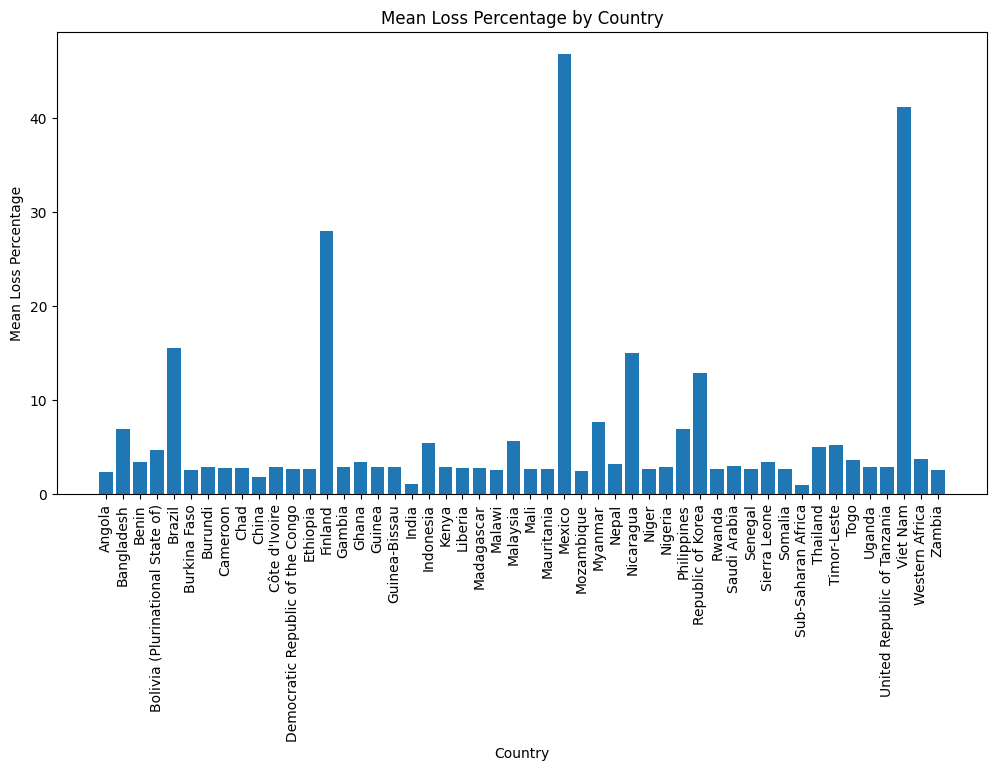

In [65]:
import matplotlib.pyplot as plt

country_loss_mean = data.groupby("country")["loss_percentage"].mean()

highest_loss_country = country_loss_mean.idxmax()
highest_loss_percentage = country_loss_mean.max()

plt.figure(figsize=(12, 6))
plt.bar(country_loss_mean.index, country_loss_mean)
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage by Country')
plt.xticks(rotation=90)
plt.show()

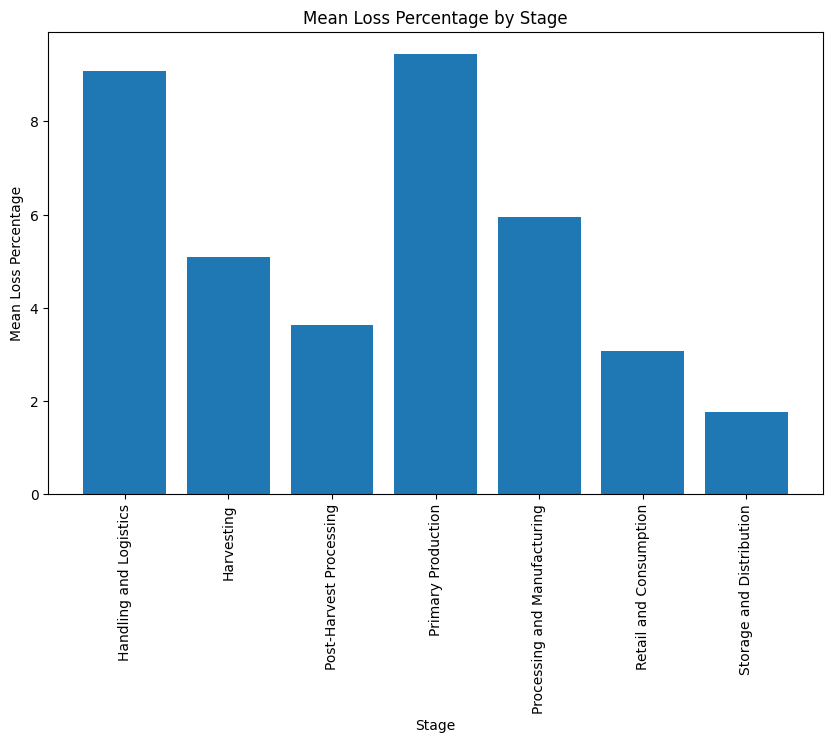

The stage with the highest loss percentage is Primary Production with a mean loss percentage of 9.45


In [66]:
# Group the data by stage and calculate the mean loss percentage for each stage
stage_loss_mean = data.groupby('Stage')['loss_percentage'].mean()

# Find the stage with the highest mean loss percentage
highest_loss_stage = stage_loss_mean.idxmax()
highest_loss_percentage_stage = stage_loss_mean.max()

# Create a bar plot to visualize the mean loss percentages by stage
plt.figure(figsize=(10, 6))
plt.bar(stage_loss_mean.index, stage_loss_mean)
plt.xlabel('Stage')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage by Stage')
plt.xticks(rotation=90)
plt.show()

print(f'The stage with the highest loss percentage is {highest_loss_stage} with a mean loss percentage of {highest_loss_percentage_stage:.2f}')


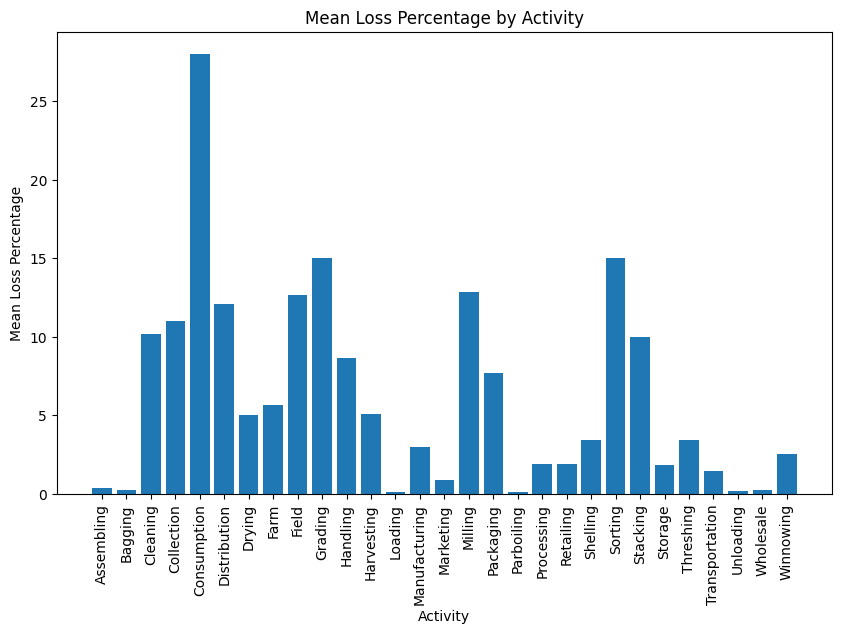

The activity with the highest loss percentage is Consumption with a mean loss percentage of 28.00


In [67]:
# Group the data by activity and calculate the mean loss percentage for each activity
activity_loss_mean = data.groupby('activity')['loss_percentage'].mean()

# Find the activity with the highest mean loss percentage
highest_loss_activity = activity_loss_mean.idxmax()
highest_loss_percentage_activity = activity_loss_mean.max()

# Create a bar plot to visualize the mean loss percentages by activity
plt.figure(figsize=(10, 6))
plt.bar(activity_loss_mean.index, activity_loss_mean)
plt.xlabel('Activity')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage by Activity')
plt.xticks(rotation=90)
plt.show()

print(f'The activity with the highest loss percentage is {highest_loss_activity} with a mean loss percentage of {highest_loss_percentage_activity:.2f}')


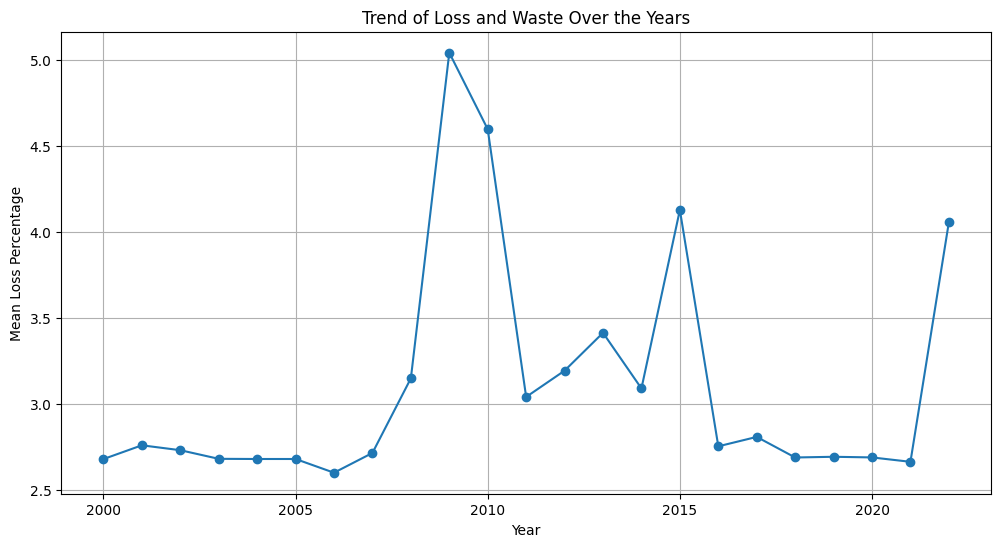

In [68]:
# Group the data by year and calculate the mean loss percentage for each year
yearly_loss_mean = data.groupby('year')['loss_percentage'].mean()

# Create a line plot to visualize the trend of loss and waste over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_loss_mean.index, yearly_loss_mean, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Loss Percentage')
plt.title('Trend of Loss and Waste Over the Years')
plt.grid(True)
plt.show()


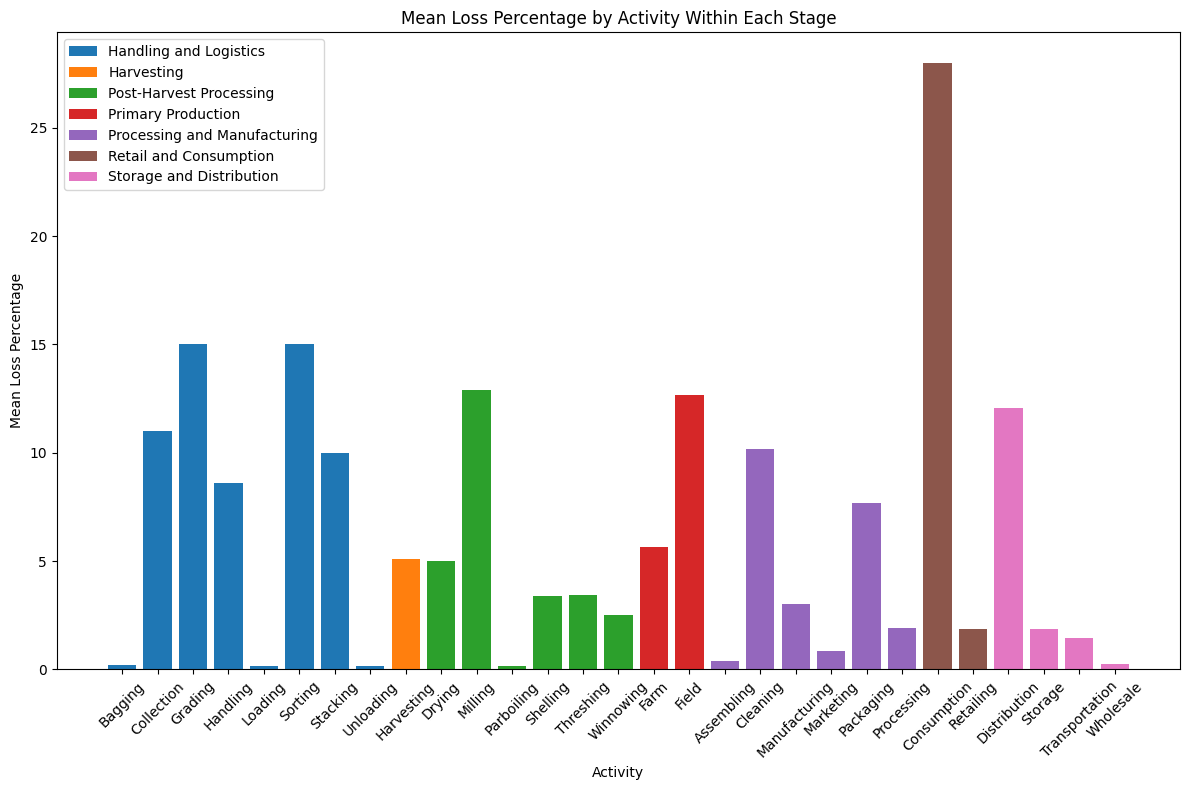

In [69]:
# Group data by "Stage" and "Activity" and calculate the mean loss percentage
grouped_data = data.groupby(['Stage', 'activity'])['loss_percentage'].mean().reset_index()

# Create a bar plot for each stage to visualize the mean loss percentage for activities
unique_stages = grouped_data['Stage'].unique()

plt.figure(figsize=(12, 8))

for stage in unique_stages:
    stage_data = grouped_data[grouped_data['Stage'] == stage]
    plt.bar(stage_data['activity'], stage_data['loss_percentage'], label=stage)

plt.xlabel('Activity')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage by Activity Within Each Stage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
country_to_continent = {
    'Myanmar': 'Asia', 'Burundi' : 'Africa', 'Western Africa':'Africa', 'Cameroon':'Africa', 'Chad':'Africa','China':'Asia', 
    'Democratic Republic of the Congo':'Africa','Sub-Saharan Africa':'Africa','Benin':'Africa','Ethiopia':'Africa',
    'Angola':'Africa','Finland':'Europe','Gambia':'Africa','Ghana':'Africa','Guinea':'Africa','India':'Asia',
    'Indonesia':'Asia',"Côte d'Ivoire":'Africa','Kenya':'Africa','Republic of Korea':'Asia', 'Liberia':'Africa', 
    'Madagascar':'Africa', 'Malawi':'Africa', 'Malaysia':'Asia','Mali':'Africa', 'Mauritania':'Africa', 'Mexico':'America', 
    'Bangladesh':'Asia', 'Mozambique':'Africa','Nepal':'Asia', 'Nicaragua':'America', 'Niger':'Africa', 'Nigeria':'Africa', 
    'Philippines':'Asia','Guinea-Bissau':'Africa', 'Timor-Leste':'Asia', 'Rwanda':'Africa','Bolivia (Plurinational State of)':'America', 
    'Saudi Arabia':'Asia', 'Senegal':'Africa','Sierra Leone':'Africa', 
    'Viet Nam':'Asia', 'Somalia':'Africa', 'Brazil':'America', 'Thailand':'Asia','Togo':'Africa', 
    'Uganda':'Africa', 'United Republic of Tanzania':'Africa', 'Burkina Faso':'Africa', 'Zambia':'Africa'
}

data['Continent'] = data['country'].map(country_to_continent)

data.head()

data.to_csv("Cleaned_continent.csv",index=False)

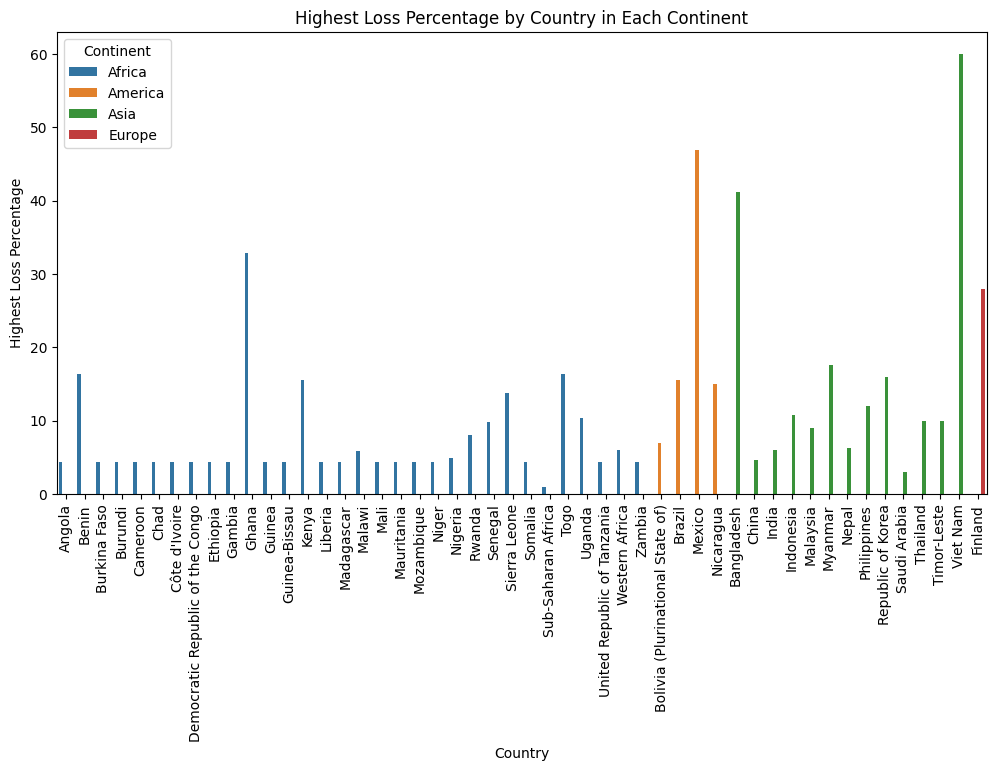

In [73]:
import seaborn as sns

# Group by continent and find the country with the highest loss percentage in each continent
highest_loss_by_country = data.groupby(['Continent', 'country'])['loss_percentage'].max()
highest_loss_by_country = highest_loss_by_country.reset_index()

# Plot a bar chart for each continent
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='loss_percentage', hue='Continent', data=highest_loss_by_country)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Highest Loss Percentage')
plt.title('Highest Loss Percentage by Country in Each Continent')
plt.show()


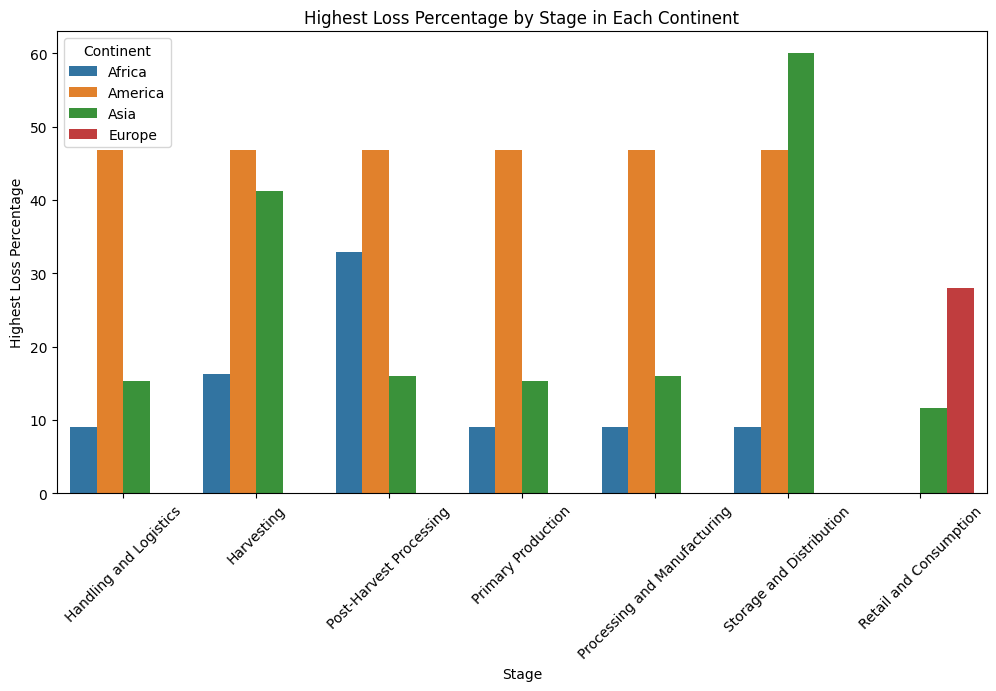

In [74]:
# Group by continent and stage to find the highest loss percentage for each stage in each continent
highest_loss_by_stage = data.groupby(['Continent', 'Stage'])['loss_percentage'].max()
highest_loss_by_stage = highest_loss_by_stage.reset_index()

# Plot a bar chart for each continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Stage', y='loss_percentage', hue='Continent', data=highest_loss_by_stage)
plt.xticks(rotation=45)
plt.xlabel('Stage')
plt.ylabel('Highest Loss Percentage')
plt.title('Highest Loss Percentage by Stage in Each Continent')
plt.show()


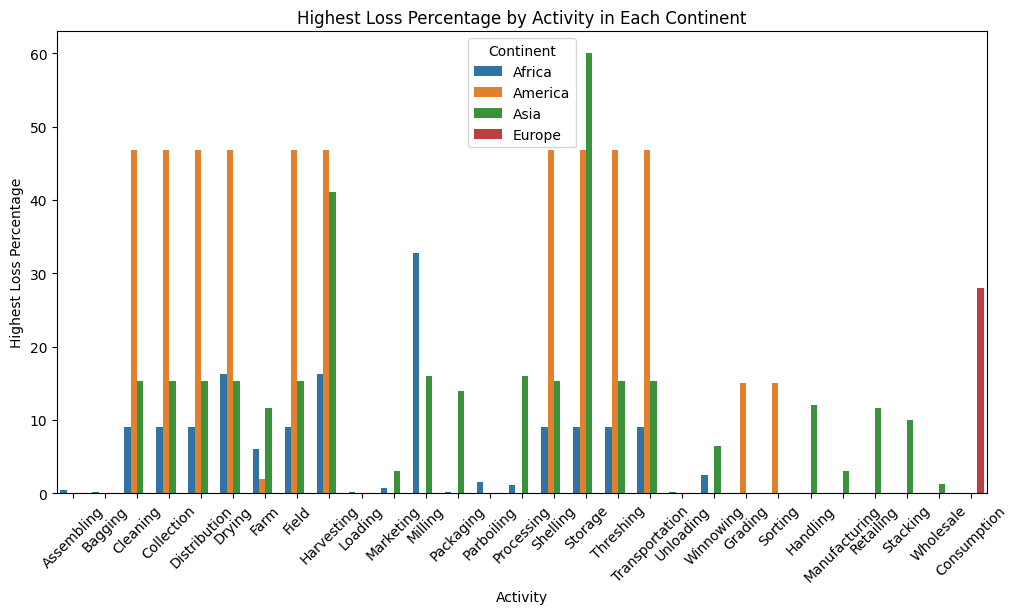

In [75]:
# Group by continent and activity to find the highest loss percentage for each activity in each continent
highest_loss_by_activity = data.groupby(['Continent', 'activity'])['loss_percentage'].max()
highest_loss_by_activity = highest_loss_by_activity.reset_index()

# Plot a bar chart for each continent
plt.figure(figsize=(12, 6))
sns.barplot(x='activity', y='loss_percentage', hue='Continent', data=highest_loss_by_activity)
plt.xticks(rotation=45)
plt.xlabel('Activity')
plt.ylabel('Highest Loss Percentage')
plt.title('Highest Loss Percentage by Activity in Each Continent')
plt.show()


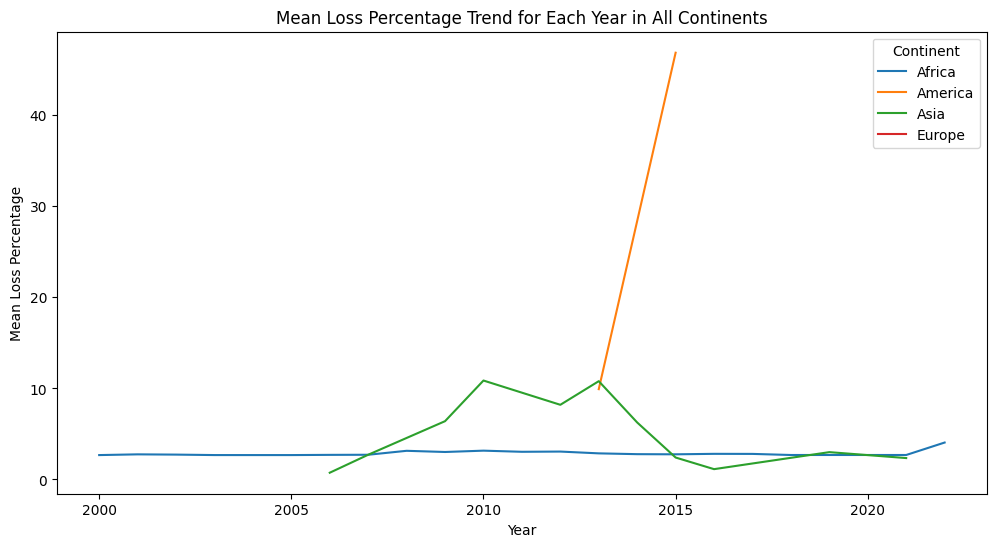

In [76]:
# Group by year and continent to find the mean loss percentage for each year in each continent
mean_loss_by_year = data.groupby(['Continent', 'year'])['loss_percentage'].mean()
mean_loss_by_year = mean_loss_by_year.reset_index()

# Plot a line chart for each continent
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='loss_percentage', hue='Continent', data=mean_loss_by_year)
plt.xlabel('Year')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage Trend for Each Year in All Continents')
plt.show()
